In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("C:\Intership\Task-2\Titanic.csv")

In [3]:
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
# Fill missing Age with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Drop the Cabin column
df.drop(columns=['Cabin'], inplace=True)

# Fill missing Embarked with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [8]:
# Check for duplicate rows
print(df.duplicated().sum())

# Remove duplicates if any
df.drop_duplicates(inplace=True)


0


In [14]:
# Convert 'Sex' and 'Embarked' to numerical using label encoding
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


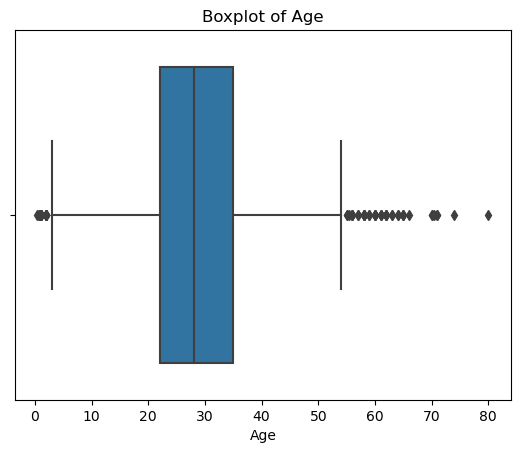

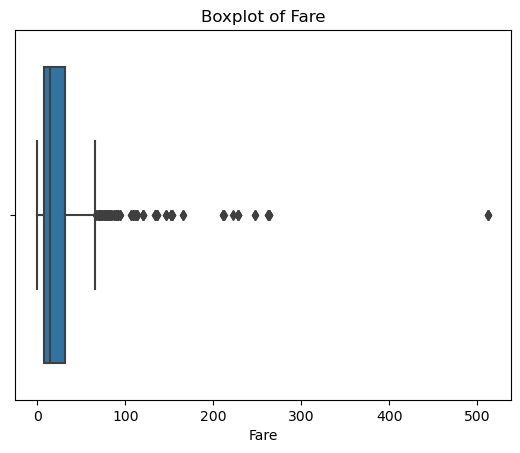

In [15]:
# checking the outliers
# Boxplot for 'Age'
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Age')
plt.show()

# Boxplot for 'Fare'
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.show()


In [17]:
# Function to calculate IQR and remove outliers
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 1st quartile
    Q3 = df[column].quantile(0.75)  # 3rd quartile
    IQR = Q3 - Q1  # Interquartile Range
    
    lower_bound = Q1 - 1.5 * IQR  # Lower bound
    upper_bound = Q3 + 1.5 * IQR  # Upper bound
    
    # Remove outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Removing outliers for 'Fare' column
df_cleaned_fare = remove_outliers_iqr(df, 'Fare')

# Removing outliers for 'Age' column
df_cleaned_age_fare = remove_outliers_iqr(df_cleaned_fare, 'Age')

# Check the shape of the dataset after removing outliers
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after removing outliers: {df_cleaned_age_fare.shape}")


Original dataset shape: (891, 13)
Dataset shape after removing outliers: (708, 13)


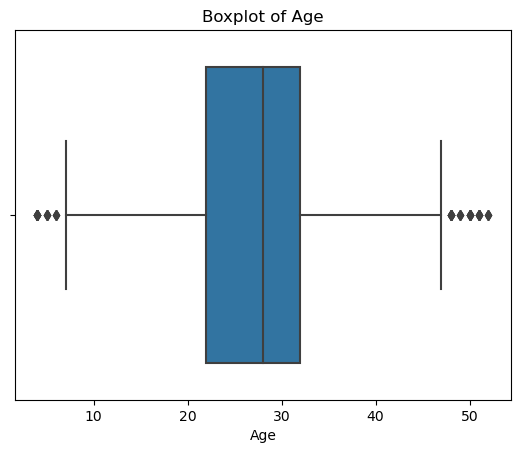

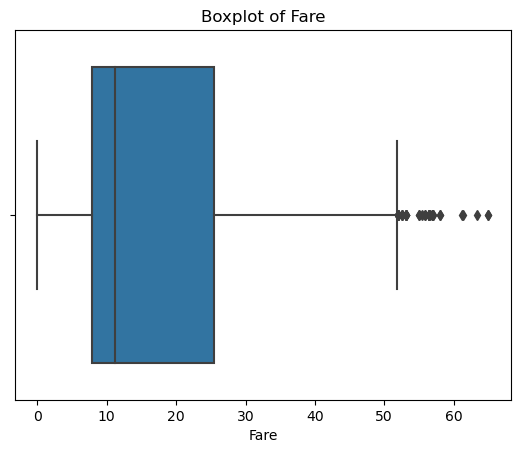

In [21]:
# checking the outliers after deleting outlier
# Boxplot for 'Age'
sns.boxplot(x=df_cleaned_age_fare['Age'])
plt.title('Boxplot of Age')
plt.show()

# Boxplot for 'Fare'
sns.boxplot(x=df_cleaned_age_fare['Fare'])
plt.title('Boxplot of Fare')
plt.show()



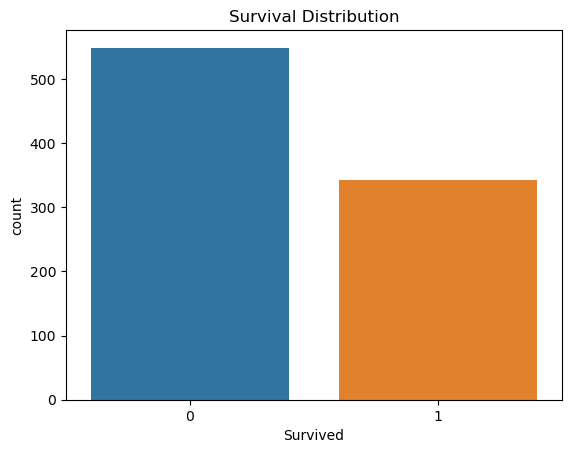

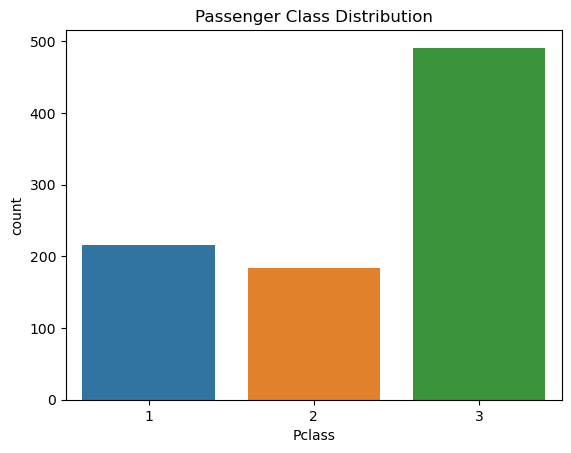

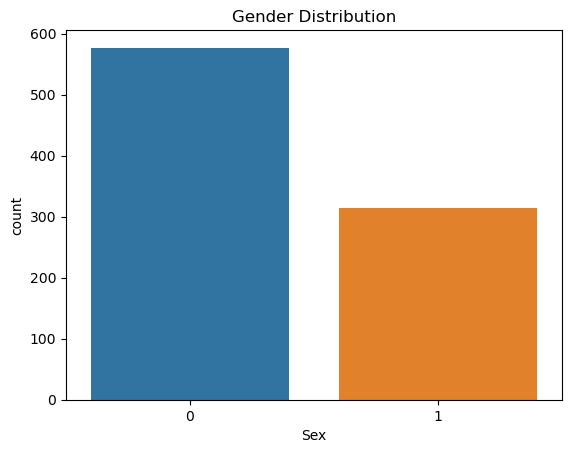

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot for categorical variables
sns.countplot(x='Survived', data=df)
plt.title('Survival Distribution')
plt.show()

sns.countplot(x='Pclass', data=df)
plt.title('Passenger Class Distribution')
plt.show()

sns.countplot(x='Sex', data=df)
plt.title('Gender Distribution')
plt.show()

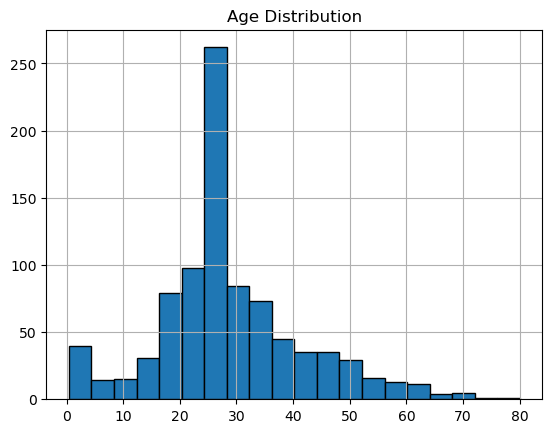

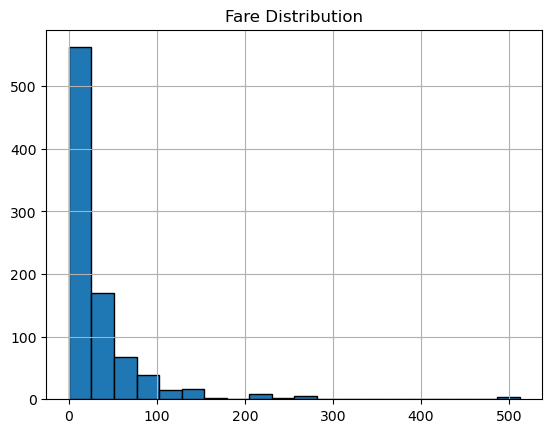

In [10]:
# Histogram for numerical variables
df['Age'].hist(bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.show()

df['Fare'].hist(bins=20, edgecolor='black')
plt.title('Fare Distribution')
plt.show()

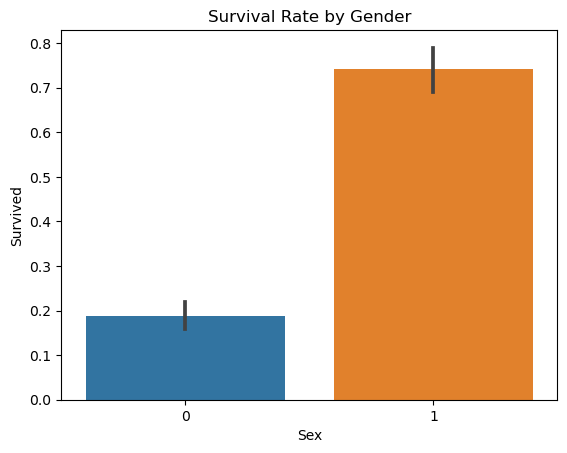

In [11]:
# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

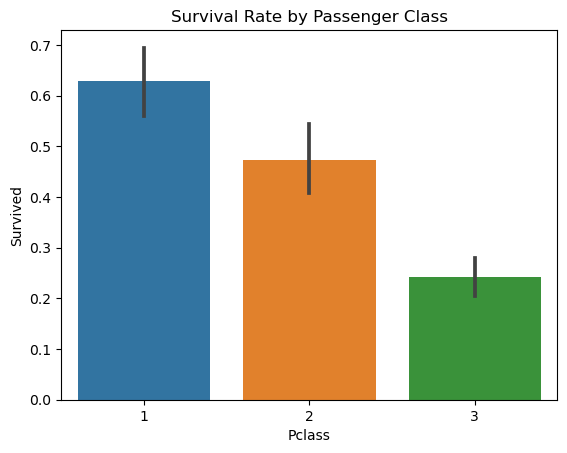

In [13]:
# Survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()